In [13]:
# use file Weekly_Quizzes1_3_copy.docx%20(1).pdf

In [30]:
from IPython.display import Image
from IPython.core.display import HTML 
print("Figure 1: Food Type Prediction")
Image(url= "./q1and2.png")

Figure 1: Food Type Prediction


In [34]:
'''
Review the table labeled Figure 1: Food Type Prediction. 
A K-Nearest Neighbor (KNN) model is used to predict food type based 
on sugar content and crunchiness for the following training set. 
If K is set to 10 and the model uses Euclidean distance, which food type will be predicted for Tomato?
'''
import pandas as pd
import numpy as np

# Food dataset with sugar content and crunchiness
data = {
    'Food Name': ['Orange', 'Grape', 'Nut', 'Shrimp', 'Fish', 'Bean', 'Bacon', 'Banana', 'Pear', 
                  'Cucumber', 'Cheese', 'Carrot', 'Apple', 'Celery', 'Cabbage', 'Tomato'],
    'Sugar content': [7, 8, 3, 2, 3, 3, 1, 10, 10, 2, 1, 5, 10, 3, 1, 6],
    'Crunchiness': [3, 5, 6, 3, 1, 7, 4, 1, 7, 8, 1, 10, 9, 10, 9, 4],
    'Food Type': ['Fruit', 'Fruit', 'Protein', 'Protein', 'Protein', 'Vegetable', 'Protein', 
                  'Fruit', 'Fruit', 'Vegetable', 'Protein', 'Vegetable', 'Fruit', 'Vegetable', 
                  'Vegetable', 'Unknown']
}

df = pd.DataFrame(data)

# Coordinates of the Tomato
tomato = np.array([6, 4])

# Function to calculate Euclidean distance
def euclidean_distance(row, point):
    return np.sqrt((row['Sugar content'] - point[0])**2 + (row['Crunchiness'] - point[1])**2)

# Calculate the Euclidean distance from Tomato to all other foods
df['Distance'] = df.apply(lambda row: euclidean_distance(row, tomato), axis=1)

# Sort by distance and get the K nearest neighbors
def find_k_nearest_neighbors(K):
    return df[df['Food Name'] != 'Tomato'].sort_values(by='Distance').head(K)

# Calculate result using K = 10
nearest_neighbors_k10 = find_k_nearest_neighbors(10)

# Count the food types in the 10 nearest neighbors
food_type_counts_k10 = nearest_neighbors_k10['Food Type'].value_counts()

# Search for the K where Protein becomes the majority
def find_k_for_protein():
    k = 1
    while k <= len(df) - 1:
        nearest_neighbors = find_k_nearest_neighbors(k)
        food_type_counts = nearest_neighbors['Food Type'].value_counts()
        if 'Protein' in food_type_counts and food_type_counts['Protein'] > food_type_counts.get('Fruit', 0):
            return k, food_type_counts
        k += 1
    return None, None

# Find the minimum K where Protein becomes the majority
min_k_protein, food_type_counts_at_k = find_k_for_protein()

print(df.sort_values(by='Distance'))
print("K=10 Nearest Neighbors:\n", nearest_neighbors_k10)
print("\nFood type counts at K=10:\n", food_type_counts_k10)
print("\nMinimum K where Protein becomes the majority:", min_k_protein)
print("\nFood type counts at minimum K for Protein:\n", food_type_counts_at_k)


'''
q2
Review the table labeled Figure 1: Food Type Prediction. 
A K-Nearest Neighbor (KNN) model is used to predict food 
type based on sugar content and crunchiness for the following training set. 
If the model uses Euclidean distance, which value should be given 
to K in order for the model to predict Tomato as a Protein?
'''

# Search for all K where Protein becomes the majority
def find_all_k_for_protein_prediction():
    protein_ks = []
    for k in range(1, len(df)):
        nearest_neighbors = find_k_nearest_neighbors(k)
        food_type_counts = nearest_neighbors['Food Type'].value_counts()
        if 'Protein' in food_type_counts and food_type_counts['Protein'] > food_type_counts.get('Fruit', 0):
            protein_ks.append((k, food_type_counts))
    return protein_ks

# Find all K values where Protein becomes the majority
all_k_protein_predictions = find_all_k_for_protein_prediction()

print(all_k_protein_predictions)


   Food Name  Sugar content  Crunchiness  Food Type  Distance
15    Tomato              6            4    Unknown  0.000000
0     Orange              7            3      Fruit  1.414214
1      Grape              8            5      Fruit  2.236068
2        Nut              3            6    Protein  3.605551
3     Shrimp              2            3    Protein  4.123106
4       Fish              3            1    Protein  4.242641
5       Bean              3            7  Vegetable  4.242641
6      Bacon              1            4    Protein  5.000000
7     Banana             10            1      Fruit  5.000000
8       Pear             10            7      Fruit  5.000000
9   Cucumber              2            8  Vegetable  5.656854
10    Cheese              1            1    Protein  5.830952
11    Carrot              5           10  Vegetable  6.082763
12     Apple             10            9      Fruit  6.403124
13    Celery              3           10  Vegetable  6.708204
14   Cab

In [36]:
'''
q3
Suppose 30% of college students live in a dorm, but only 10% of high school students live in a dorm. 
In addition, the percentage of high school students who can drive is 15%, 
and the percentage of college students who can drive is 23%. 
One-fifth of the students are college students and the rest are high school students. 
If a student can drive and lives in the dorm, is the student more likely to be a college or high school student? 
(You can assume independence between students who live in a dorm and those who can drive.)
'''
# Import necessary library
import numpy as np

# Given probabilities
P_college = 0.2  # Probability of being a college student
P_high_school = 0.8  # Probability of being a high school student

P_dorm_college = 0.3  # Probability of living in a dorm, given college student
P_dorm_high_school = 0.1  # Probability of living in a dorm, given high school student

P_drive_college = 0.23  # Probability of being able to drive, given college student
P_drive_high_school = 0.15  # Probability of being able to drive, given high school student

# Calculate P(drive ∩ dorm | college) and P(drive ∩ dorm | high school)
P_drive_dorm_college = P_drive_college * P_dorm_college
P_drive_dorm_high_school = P_drive_high_school * P_dorm_high_school

# Numerators of Bayes' Theorem for college and high school
numerator_college = P_drive_dorm_college * P_college
numerator_high_school = P_drive_dorm_high_school * P_high_school

# Display the results for comparison
result = {
    "P(drive ∩ dorm | college) * P(college)": numerator_college,
    "P(drive ∩ dorm | high school) * P(high school)": numerator_high_school
}

print(result)

{'P(drive ∩ dorm | college) * P(college)': 0.013800000000000002, 'P(drive ∩ dorm | high school) * P(high school)': 0.012}


In [26]:
from IPython.display import Image
from IPython.core.display import HTML 
print("Figure 2: Rainy Day Prediction Dataset.")
Image(url= "./q4and5.png")

Figure 2: Rainy Day Prediction Dataset.


In [27]:
'''
q4
Review the table labeled Figure 2: Rainy Day Prediction Dataset. 
You need a model to predict if a day is rainy or not based on the following 
conditions: sunshine, wind, atmosphere, and temperature. In a Naïve Bayes classifier, 
given a rainy day, what is the estimated probability of having sunshine, wind, high atmosphere and high temperature?
'''
# Given conditional probabilities from the table

# Probability of Sunshine on a Rainy Day: 2 out of 8 (Yes = 2, No = 6)
P_sunshine_given_rainy = 2 / 8

# Probability of Wind on a Rainy Day: 6 out of 8 (Yes = 6, No = 2)
P_wind_given_rainy = 6 / 8

# Probability of High Atmosphere on a Rainy Day: 8 out of 8 (High = 8, Low = 0)
P_high_atmosphere_given_rainy = 8 / 8

# Probability of High Temperature on a Rainy Day: 5 out of 8 (High = 5, Low = 3)
P_high_temperature_given_rainy = 5 / 8

# Now multiply the probabilities together (Naïve Bayes assumes conditional independence)
P_total = P_sunshine_given_rainy * P_wind_given_rainy * P_high_atmosphere_given_rainy * P_high_temperature_given_rainy

# Print the final estimated probability
print("Estimated Probability of sunshine, wind, high atmosphere, and high temperature on a rainy day:", P_total)


Estimated Probability of sunshine, wind, high atmosphere, and high temperature on a rainy day: 0.1171875


In [33]:
'''
q5
Review the table labeled Figure 2: Rainy Day Prediction Dataset. 
A Naïve Bayes classifier is trained for the dataset in order 
to predict whether a day is rainy or not. If on a particular day the weather is sunny, 
the temperature is low, the atmosphere is high, and there is no wind, what will the model predict?
'''

# Given counts from the table

# Prior probabilities
total_rainy = 8 + 6  # Rainy yes = 8, Rainy no = 6
total_not_rainy = 8 + 4  # Not Rainy yes = 8, Not Rainy no = 4
total_days = total_rainy + total_not_rainy

P_rainy = total_rainy / total_days
P_not_rainy = total_not_rainy / total_days

# Conditional probabilities for Rainy
P_sunny_given_rainy = 2 / 8  # Sunny = Yes for rainy days
P_no_wind_given_rainy = 2 / 8  # Wind = No for rainy days
P_high_atmosphere_given_rainy = 8 / 8  # High Atmosphere for rainy days
P_low_temp_given_rainy = 3 / 8  # Low temperature for rainy days

# Conditional probabilities for Not Rainy
P_sunny_given_not_rainy = 8 / 12  # Sunny = Yes for non-rainy days
P_no_wind_given_not_rainy = 10 / 12  # Wind = No for non-rainy days
P_high_atmosphere_given_not_rainy = 2 / 12  # High Atmosphere for non-rainy days
P_low_temp_given_not_rainy = 6 / 12  # Low temperature for non-rainy days

# Naïve Bayes prediction for Rainy
P_rainy_given_weather = (
    P_rainy *
    P_sunny_given_rainy *
    P_no_wind_given_rainy *
    P_high_atmosphere_given_rainy *
    P_low_temp_given_rainy
)

# Naïve Bayes prediction for Not Rainy
P_not_rainy_given_weather = (
    P_not_rainy *
    P_sunny_given_not_rainy *
    P_no_wind_given_not_rainy *
    P_high_atmosphere_given_not_rainy *
    P_low_temp_given_not_rainy
)

# Compare probabilities
if P_rainy_given_weather > P_not_rainy_given_weather:
    prediction = "Rainy"
else:
    prediction = "Not Rainy"

# Print results
print(f"Probability of Rainy: {P_rainy_given_weather}")
print(f"Probability of Not Rainy: {P_not_rainy_given_weather}")
print(f"Prediction: {prediction}")


Probability of Rainy: 0.012620192307692308
Probability of Not Rainy: 0.021367521367521368
Prediction: Not Rainy


In [37]:
from IPython.display import Image
from IPython.core.display import HTML 
print(" Figure 3: Car Dataset Used By Police Force.")
Image(url= "./q6and7.png")

 Figure 3: Car Dataset Used By Police Force.


In [23]:
'''
q6
Review the table labeled Figure 3: Car Dataset Used By Police Force. 
Attribute A shows if a car was speeding, 
Attribute B shows if a car has a plate number, 
Attribute C shows if a car is new, and Class Attribute shows if a car was stolen. 

If a car is stolen, what is the probability that the car has a plate number?
'''

# Data from the table
data = {
    'A': ['F', 'F', 'F', 'F', 'F', 'T', 'T', 'T', 'T', 'T'],
    'B': ['F', 'F', 'T', 'T', 'F', 'F', 'F', 'F', 'T', 'F'],
    'C': ['F', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'],
    'Class': ['Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y']
}

import pandas as pd

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Step 1: Count total stolen cars (Class = Y)
total_stolen = df[df['Class'] == 'Y'].shape[0]

# Step 2: Count stolen cars with a plate number (B = T and Class = Y)
stolen_with_plate = df[(df['Class'] == 'Y') & (df['B'] == 'T')].shape[0]

# Step 3: Calculate the probability
P_plate_given_stolen = stolen_with_plate / total_stolen

# Print the results
print(f"Total stolen cars: {total_stolen}")
print(f"Stolen cars with plate number: {stolen_with_plate}")
print(f"Probability that a stolen car has a plate number: {P_plate_given_stolen}")


Total stolen cars: 5
Stolen cars with plate number: 1
Probability that a stolen car has a plate number: 0.2


In [24]:
'''
q7
Review the table labeled Figure 3: Car Dataset Used By Police Force. 
Attribute A shows if a car was speeding, 
Attribute B shows if a car has a plate number, 
Attribute C shows if a car is new, and Class Attribute shows if a car was stolen. 
Consider if one of the probabilities is zero while applying Naive Bayes, use Laplace smoothing.

If a Naïve Bayes model is trained for this dataset,
what will be the Class Attribute prediction for an old car that was not speeding and has a plate number?
'''
# Step 1: Calculate prior probabilities
P_stolen = df[df['Class'] == 'Y'].shape[0] / df.shape[0]
P_not_stolen = df[df['Class'] == 'N'].shape[0] / df.shape[0]

# Step 2: Calculate conditional probabilities with Laplace smoothing (for binary attributes)
def laplace_smoothing(feature, value, target_class, df, k=2):
    count_X_given_class = df[(df[feature] == value) & (df['Class'] == target_class)].shape[0]
    count_class = df[df['Class'] == target_class].shape[0]
    return (count_X_given_class + 1) / (count_class + k)

# Conditional probabilities for stolen (Class = Y)
P_A_F_given_stolen = laplace_smoothing('A', 'F', 'Y', df)  # A = F (Not speeding)
P_B_T_given_stolen = laplace_smoothing('B', 'T', 'Y', df)  # B = T (Has plate number)
P_C_F_given_stolen = laplace_smoothing('C', 'F', 'Y', df)  # C = F (Old car)

# Conditional probabilities for not stolen (Class = N)
P_A_F_given_not_stolen = laplace_smoothing('A', 'F', 'N', df)
P_B_T_given_not_stolen = laplace_smoothing('B', 'T', 'N', df)
P_C_F_given_not_stolen = laplace_smoothing('C', 'F', 'N', df)

# Step 3: Calculate Naïve Bayes probabilities
P_stolen_given_ABC = (
    P_stolen * P_A_F_given_stolen * P_B_T_given_stolen * P_C_F_given_stolen
)

P_not_stolen_given_ABC = (
    P_not_stolen * P_A_F_given_not_stolen * P_B_T_given_not_stolen * P_C_F_given_not_stolen
)

# Step 4: Make the prediction
if P_stolen_given_ABC > P_not_stolen_given_ABC:
    prediction = "Stolen (Y)"
elif P_stolen_given_ABC == P_not_stolen_given_ABC:
    prediction = "Tie"
else:
    prediction = "Not Stolen (N)"

# Print results
print(f"Probability of stolen given conditions: {P_stolen_given_ABC}")
print(f"Probability of not stolen given conditions: {P_not_stolen_given_ABC}")
print(f"Prediction: {prediction}")

Probability of stolen given conditions: 0.017492711370262388
Probability of not stolen given conditions: 0.017492711370262388
Prediction: Tie


In [38]:
from IPython.display import Image
from IPython.core.display import HTML 
print("Figure 4: Neural Network")
Image(url= "./q8.png")

Figure 4: Neural Network


In [12]:
'''
q8
Review the figure labeled Figure 4: Neural Network. 
The given neural network finished a forward pass and now will perform a backpropagation to tune its parameters. 
The network uses a logistic activation function, $f(x)=\frac{1}{(1+{e}^{hx})}$ with a learning rate of 0.5, 
and loss is calculated using a squared error function, $ l=\frac{1}{2}(target-output{)}^{2}$. 

Given the inputs, ground truth output, weights, and biases listed below, what will the value of w5 be after the first iteration of backpropagation? (Round your answer to the nearest hundredth.)

Inputs = $ {I}_{1}=0.05,{I}_{2}=0.1$
Weights = $ {w}_{1}=0.15,{w}_{2}=0.2,{w}_{3}=0.25,{w}_{4}=0.30,{w}_{5}=0.40,{w}_{6}=0.45$
Biases = $ {B}_{1}=0.35,{B}_{2}=0.6$
Learning rate: 𝜂 = 0.5
Ground-truth output t = 0.01

Note: Your answer should be in format X.X or X.XX (depending on precision required on decimal places).
'''
import math

# Activation function (logistic sigmoid function)
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Inputs and weights from the problem statement
I1 = 0.05  # Input 1
I2 = 0.10  # Input 2
w1 = 0.15  # Weight from I1 to H1
w2 = 0.20  # Weight from I2 to H1
w3 = 0.25  # Weight from I1 to H2
w4 = 0.30  # Weight from I2 to H2
w5 = 0.40  # Weight from H1 to output
w6 = 0.45  # Weight from H2 to output
B1 = 0.35  # Bias for hidden layer
B2 = 0.6   # Bias for output layer
learning_rate = 0.5  # Learning rate
target_output = 0.01  # Ground-truth target output

# Step 1: Forward pass to calculate hidden layer activations
# Hidden layer node H1
H1_input = I1 * w1 + I2 * w2 + B1  # Input to H1
H1 = sigmoid(H1_input)  # Activation at H1

# Hidden layer node H2
H2_input = I1 * w3 + I2 * w4 + B1  # Input to H2
H2 = sigmoid(H2_input)  # Activation at H2

# Step 2: Forward pass to calculate the output layer activation
O_input = H1 * w5 + H2 * w6 + B2  # Input to output node O
O = sigmoid(O_input)  # Output activation

# Step 3: Calculate the error (squared error loss)
error = 0.5 * (target_output - O) ** 2  # Squared error loss

# Step 4: Backpropagation - calculate gradient for w5
# Derivative of the loss with respect to the output O
d_loss_d_O = -(target_output - O)

# Derivative of the output O with respect to weight w5
d_O_d_w5 = H1 * sigmoid_derivative(O)

# Full gradient for w5
gradient_w5 = d_loss_d_O * d_O_d_w5

# Step 5: Update w5 using the learning rate
w5_updated = w5 - learning_rate * gradient_w5

# Print the updated weight w5 and rounded result to the nearest hundredth
print("Updated w5:", w5_updated)
print("Rounded w5:", round(w5_updated, 2))


Updated w5: 0.35891647971788465
Rounded w5: 0.36


In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
print("Figure 5: Support Vector Machine (SVM) Dataset")
Image(url= "./q9.png")

Figure 5: Support Vector Machine (SVM) Dataset


TypeError: Input z must be 2D, not 1D

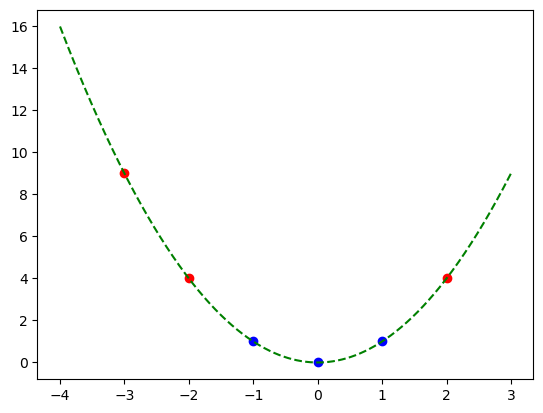

In [2]:
'''
q9
Review the table labeled Figure 5: Support Vector Machine (SVM) Dataset. 
Your friend has asked you to train a Support Vector Machine (SVM) on the provided dataset. 
You check the dataset, which is one dimensional, and understand that there is no 
hyperplane that can completely separate the two classes. Therefore, linear SVM is not the best option. 
If you transform the data into two dimensions [(x)(x,x2)], and you decide to use non-linear SVM, 
which hyperplane will the SVM provide for separating the two classes?
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Original dataset
X = np.array([[-3], [-2], [-1], [0], [1], [2]])
y = np.array([-1, -1, 1, 1, 1, -1])  # Class labels (-1 for negative, 1 for positive)

# Transform the data to 2D using the (x, x^2) transformation
X_transformed = np.hstack((X, X ** 2))

# Train a non-linear SVM with a polynomial kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_transformed, y)

# Create a mesh grid to visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 500)
yy = xx ** 2  # Quadratic transformation

# Predict using the SVM model
Z = svm_model.decision_function(np.c_[xx, yy])

# Plotting
plt.scatter(X_transformed[y == 1][:, 0], X_transformed[y == 1][:, 1], color='b', label='Positive Class (+)')
plt.scatter(X_transformed[y == -1][:, 0], X_transformed[y == -1][:, 1], color='r', label='Negative Class (-)')
plt.plot(xx, yy, 'g--', label='Transformed x^2 boundary')

# Plot the decision boundary
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k', linestyles=['-'])

# Add labels and legend
plt.xlabel('X')
plt.ylabel('X^2')
plt.title('SVM Decision Boundary in Transformed Space')
plt.legend()

# Show the plot
plt.show()


In [4]:
# Step 1: Define the original dataset (1D data)
data = [
    (-3, -1),  # (x, class)
    (-2, -1),
    (-1,  1),
    ( 0,  1),
    ( 1,  1),
    ( 2, -1)
]

# Step 2: Manually transform the data (x -> (x, x^2))
transformed_data = [(x, x**2, label) for x, label in data]

# Step 3: Display the transformed dataset
print("Transformed Data (x, x^2, class):")
for x, x2, label in transformed_data:
    print(f"({x}, {x2}, {label})")

# Step 4: Manually estimate the decision boundary by analyzing the transformed data
# We know that the negative class (-1) and positive class (+1) are not linearly separable in 1D,
# but in the transformed 2D space, they can be separated by a boundary like x^2 = c.

# Let’s manually calculate and check for a reasonable boundary:
# We will check where the separation lies between (x, x^2) points of different classes

# Negative class points:
neg_class_points = [(x, x2) for x, x2, label in transformed_data if label == -1]

# Positive class points:
pos_class_points = [(x, x2) for x, x2, label in transformed_data if label == 1]

# Step 5: Estimate the decision boundary (x^2 = 2.5 is reasonable from the transformed data)
decision_boundary_x2 = 2.5

print(f"\nEstimated Decision Boundary: x^2 = {decision_boundary_x2}")

# Step 6: Now let's verify the decision boundary manually
# If x^2 = 2.5 is the decision boundary, it should separate the positive and negative class points.
# Positive points should lie below this boundary, and negative points should lie above.

print("\nVerifying Decision Boundary:")
for x, x2, label in transformed_data:
    if label == 1 and x2 < decision_boundary_x2:
        print(f"Positive point ({x}, {x2}) is correctly classified below the boundary.")
    elif label == -1 and x2 > decision_boundary_x2:
        print(f"Negative point ({x}, {x2}) is correctly classified above the boundary.")
    else:
        print(f"Point ({x}, {x2}) might be misclassified.")


Transformed Data (x, x^2, class):
(-3, 9, -1)
(-2, 4, -1)
(-1, 1, 1)
(0, 0, 1)
(1, 1, 1)
(2, 4, -1)

Estimated Decision Boundary: x^2 = 2.5

Verifying Decision Boundary:
Negative point (-3, 9) is correctly classified above the boundary.
Negative point (-2, 4) is correctly classified above the boundary.
Positive point (-1, 1) is correctly classified below the boundary.
Positive point (0, 0) is correctly classified below the boundary.
Positive point (1, 1) is correctly classified below the boundary.
Negative point (2, 4) is correctly classified above the boundary.


In [16]:
# Step 1: Define the transformed dataset (x -> (x, x^2))
transformed_data = [
    (-3, 9, -1),  # (x, x^2, class)
    (-2, 4, -1),
    (-1, 1, 1),
    ( 0, 0, 1),
    ( 1, 1, 1),
    ( 2, 4, -1)
]

# Step 2: Identify the support vectors
neg_class_support_vectors = [(x, x2) for x, x2, label in transformed_data if label == -1]
pos_class_support_vectors = [(x, x2) for x, x2, label in transformed_data if label == 1]

print("Negative class support vectors:", neg_class_support_vectors)
print("Positive class support vectors:", pos_class_support_vectors)

# Step 3: Calculate the decision boundary as the midpoint between the support vectors
neg_class_x2 = [x2 for x, x2 in neg_class_support_vectors]
pos_class_x2 = [x2 for x, x2 in pos_class_support_vectors]
print(neg_class_x2)
print(min(neg_class_x2))
print(pos_class_x2)
print(max(pos_class_x2))
# The boundary is the midpoint between the closest points from both classes
decision_boundary_x2 = (min(neg_class_x2) + max(pos_class_x2)) / 2

print(f"Optimal decision boundary (x^2): {decision_boundary_x2}")


Negative class support vectors: [(-3, 9), (-2, 4), (2, 4)]
Positive class support vectors: [(-1, 1), (0, 0), (1, 1)]
[9, 4, 4]
4
[1, 0, 1]
1
Optimal decision boundary (x^2): 2.5


In [12]:
"""
q10

Review the table labeled Figure 5: Support Vector Machine (SVM) Dataset. 
Your friend has asked you to train a Support Vector Machine (SVM) on the provided dataset. 
You check the dataset, which is one dimensional, and understand that there is no hyperplane 
that can completely separate the two classes. Therefore, linear SVM is not the best option. 
If you transform the data into two dimensions $ [(x)\to (x,{x}^{2})]$ and you decide to use non-linear SVM, 
which points will be support vectors?

"""

# Step 1: Define the original dataset (1D data)
data = [
    (-3, -1),  # (x, class)
    (-2, -1),
    (-1,  1),
    ( 0,  1),
    ( 1,  1),
    ( 2, -1)
]

# Step 2: Manually transform the data (x -> (x, x^2))
transformed_data = [(x, x**2, label) for x, label in data]

# Step 3: Display the transformed dataset
print("Transformed Data (x, x^2, class):")
for x, x2, label in transformed_data:
    print(f"({x}, {x2}, {label})")

# Step 4: Identify the support vectors manually
# Based on the problem's explanation, we expect support vectors to be the points closest to the boundary

# Support vectors will likely be:
# Negative class: (-2, 4), (2, 4)
# Positive class: (-1, 1), (1, 1)

neg_class_support_vectors = [(x, x2) for x, x2, label in transformed_data if label == -1]
pos_class_support_vectors = [(x, x2) for x, x2, label in transformed_data if label == 1]

print("\nNegative class support vectors:", neg_class_support_vectors)
print("Positive class support vectors:", pos_class_support_vectors)

# Display likely support vectors
support_vectors = [(-2, 4), (2, 4), (-1, 1), (1, 1)]
print("\nSupport vectors:", support_vectors)



Transformed Data (x, x^2, class):
(-3, 9, -1)
(-2, 4, -1)
(-1, 1, 1)
(0, 0, 1)
(1, 1, 1)
(2, 4, -1)

Negative class support vectors: [(-3, 9), (-2, 4), (2, 4)]
Positive class support vectors: [(-1, 1), (0, 0), (1, 1)]

Support vectors: [(-2, 4), (2, 4), (-1, 1), (1, 1)]
